<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

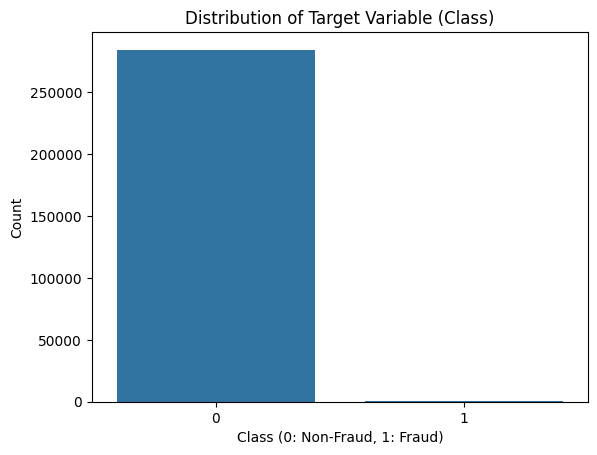

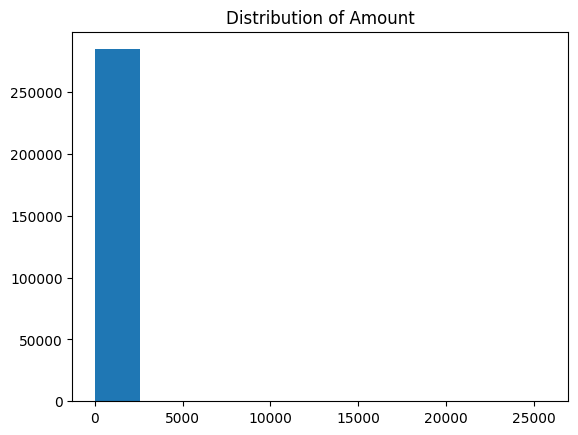

Counter({0: 284315, 1: 284315})
Logistic Regression: 0.9137752141111092
Naive Bayes: 0.909853507553242
KNN: 0.9732778784095106
Decision Tree: 0.9770413098148181
Random Forest: 0.9803387088264777
GBM: 0.9321175456799676


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Load data
df = pd.read_csv('creditcard.csv')
pd.set_option('display.max_columns', None)
print(df.info())

# Dealing with Missing Values
print(df.isnull().sum())

# Data Visualization
sns.countplot(x='Class', data=df)
plt.title('Distribution of Target Variable (Class)')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Count')
plt.show()

plt.hist(df["Amount"])
plt.title('Distribution of Amount')
plt.show()

# Prepare features and target
X = df.drop(['Time', 'Class'], axis=1)
Y = df['Class']

# Dealing with Imbalance
sms = SMOTE(random_state=0)
X, Y = sms.fit_resample(X, Y)
print(Counter(Y))

# Apply PCA
pca = PCA(n_components=2)
X = pca.fit_transform(X)

# Convert X back to DataFrame
X = pd.DataFrame(X, columns=['PC1', 'PC2'])

# Split data (use the same split for all models)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# 1. Logistic Regression
logr = LogisticRegression(random_state=0)
logr.fit(X_train, y_train)
y_pred = logr.predict(X_test)
print("Logistic Regression:", accuracy_score(y_test, y_pred))

# 2. Naive Bayes Classifier
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
print("Naive Bayes:", accuracy_score(y_test, y_pred))

# 3. KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("KNN:", accuracy_score(y_test, y_pred))

# 4. Decision Tree
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("Decision Tree:", accuracy_score(y_test, y_pred))

# 5. Random Forest
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Random Forest:", accuracy_score(y_test, y_pred))

# 6. Gradient Boosting
gbm = GradientBoostingClassifier(n_estimators=10, random_state=0)
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)
print("GBM:", accuracy_score(y_test, y_pred))